In [1]:
%matplotlib notebook
#import modules
import pandas as pd
import glob
import numpy as np
import sys
import matplotlib.pyplot as plt

# Create a DF for the entire dataset (1910 - 2018) from text files downloaded from SSN website

In [2]:
#create a dataframe
name_df = pd.DataFrame()

#open, read all text files downloaded from SSN website and name the column labels
for files in glob.glob('SSN_data/Files by name/*.txt'):
    comb_data = pd.read_csv(files,names=['state', 'gender', 'year', 'name', 'count'])
#concatenate text files in the dataframe
    name_df = pd.concat([name_df,comb_data],axis=0,ignore_index=True)
name_df.head()

,state,gender,year,name,count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


# import data for state classification (R/D)

In [3]:
#import data for state classification (R/D) from csv and create DF (source wikipedia)
States_df = pd.read_csv('blueRedStates.csv',encoding='ISO-8859-1')
States_df.head(10)

,state_Name,state,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,R/D No change
0,Alabama,AL,R,D,R,R,R,R,R,R,R,R,R,R,True
1,Alaska,AK,R,R,R,R,R,R,R,R,R,R,R,R,True
2,Arizona,AZ,R,R,R,R,R,R,D,R,R,R,R,R,True
3,Arkansas,AR,R,D,R,R,R,D,D,R,R,R,R,R,True
4,California,CA,R,R,R,R,R,D,D,D,D,D,D,D,True
5,Colorado,CO,R,R,R,R,R,D,R,R,R,D,D,D,True
6,Connecticut,CT,R,R,R,R,R,D,D,D,D,D,D,D,True
7,Delaware,DE,R,D,R,R,R,D,D,D,D,D,D,D,True
8,District of Columbia,DC,D,D,D,D,D,D,D,D,D,D,D,D,True
9,Florida,FL,R,D,R,R,R,R,D,R,R,D,D,R,False


# The group decided to base our analysis on 2012 (Obama-Romney) vs. 2016 (Trump-H.Clinton) election years


# 2012 Election Year

In [4]:
#create a DF for 2012 eleciton year by filtering total DF on selected year
Election2012=name_df.loc[(name_df['year']==2012)].reset_index(drop=True)
print(Election2012.head())

  state gender  year     name  count
0    AK      F  2012     Emma     57
1    AK      F  2012   Sophia     56
2    AK      F  2012   Olivia     49
3    AK      F  2012  Abigail     38
4    AK      F  2012      Ava     32


# Create a list of states grouped by red(R) and blue(D) for 2012 election year; then create a DF of names for each group and find top 10 names for each gender

In [5]:
# set up list and append state names for red(republican) States
red2012=[]
red2012=States_df.loc[States_df["2012"]=='R','state'].tolist()

#create a names df for 2012 Red States
red2012names=Election2012[Election2012['state'].isin(red2012)]

#find 10 most pupulart names - for each gender, sorted by the most popular for each gender in decending order
topRedNames2012=red2012names.groupby(['gender','year','name'])['count'].sum().reset_index().sort_values(by='count',ascending=False).reset_index(drop=True)
topRedNames2012_sorted=topRedNames2012.groupby('gender').head(10)
topRedNames2012_sorted.sort_values(['gender','count'], ascending=False).reset_index(drop=True)

,gender,year,name,count
0,M,2012,William,7603
1,M,2012,Mason,7280
2,M,2012,Jacob,6934
3,M,2012,Noah,6355
4,M,2012,Ethan,6323
5,M,2012,Liam,6022
6,M,2012,Elijah,5999
7,M,2012,Aiden,5799
8,M,2012,Jayden,5790
9,M,2012,James,5589


<IPython.core.display.Javascript object>


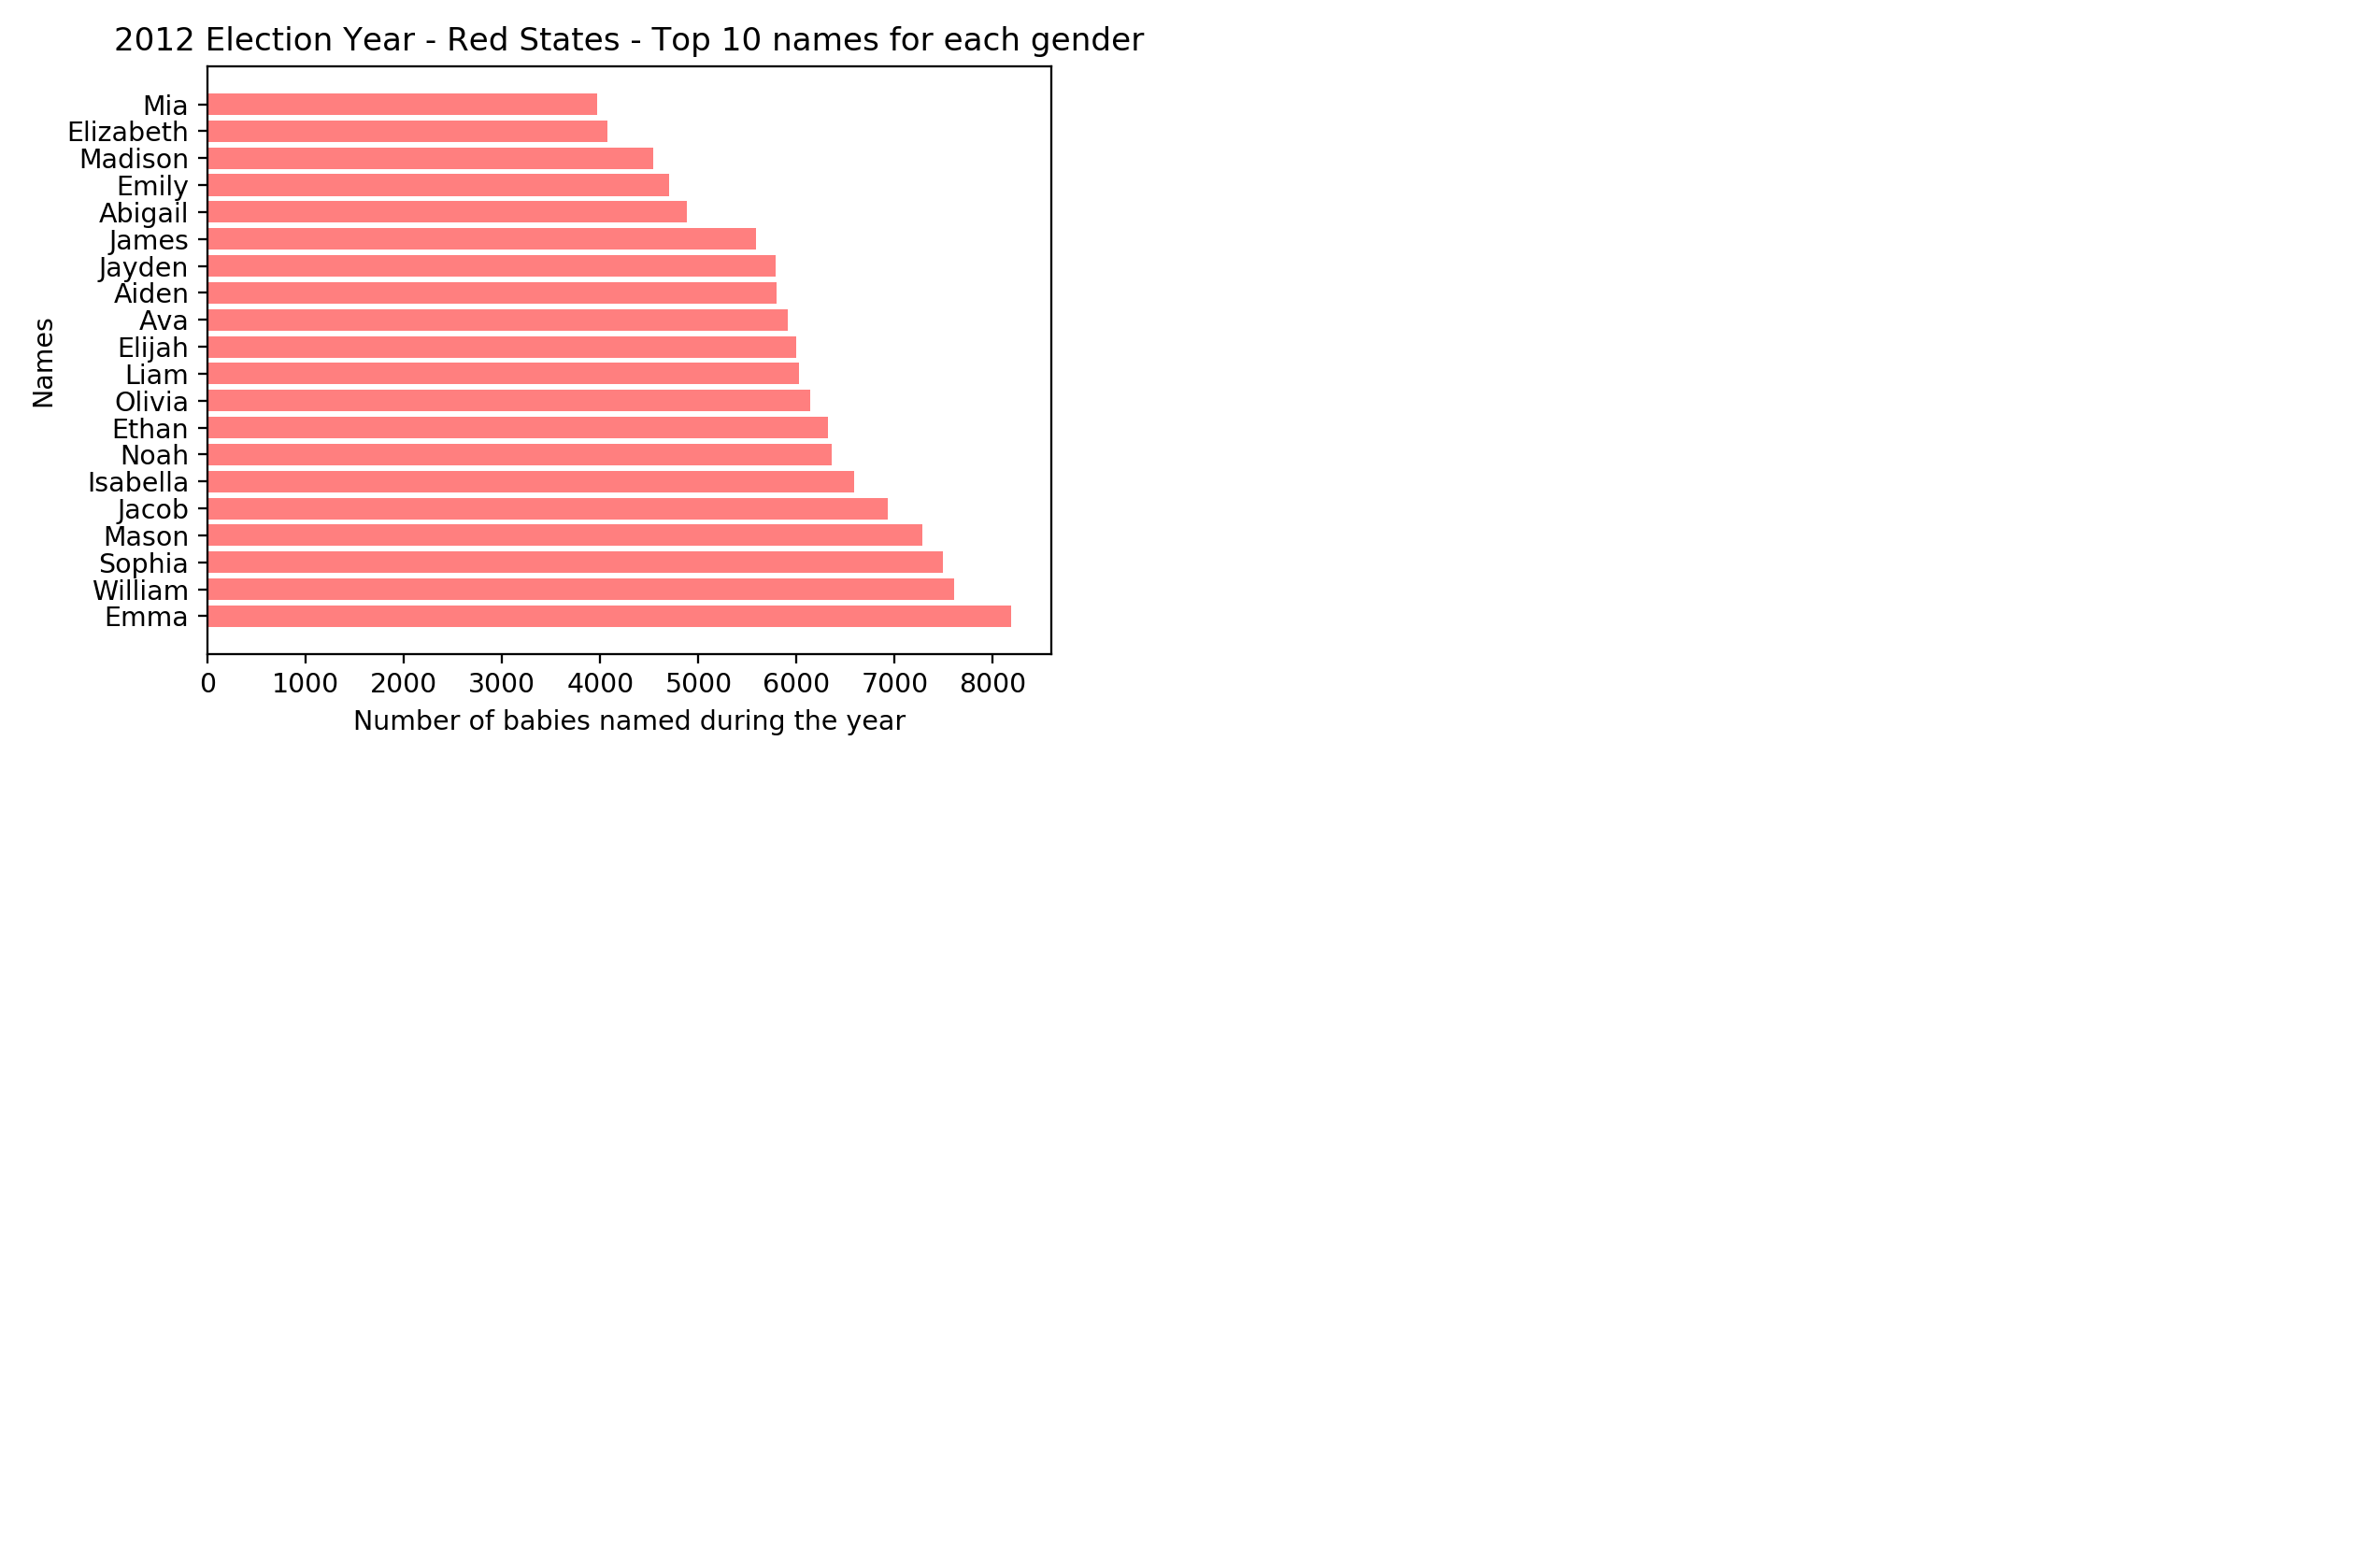

In [7]:
# Set y axis and tick locations
users = topRedNames2012_sorted['count']
y_axis = np.arange(len(users))
tick_locations = [value for value in y_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.barh(y_axis, users, color='red', alpha=0.5, align="center")
plt.yticks(tick_locations, topRedNames2012_sorted['name'], rotation="horizontal")

# Give our chart some labels and a tile
plt.title("2012 Election Year - Red States - Top 10 names for each gender")
plt.xlabel("Number of babies named during the year")
plt.ylabel("Names")

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("output_data/top10red2012electionBar.png")
plt.show()

In [8]:
# set up list and append state names for blue(democrat) States
blue2012=[]
blue2012=States_df.loc[States_df["2012"]=='D','state'].tolist()
#blue2012

#create a names df for 2012 blue states
blue2012names=Election2012[Election2012['state'].isin(blue2012)]
#blue2012names.head()lue2012

#find 10 most pupulart names - for each gender, sorted by the most popular for each gender in decending order
topBlueNames2012=blue2012names.groupby(['gender','year','name'])['count'].sum().reset_index().sort_values(by='count',ascending=False).reset_index(drop=True)
topBlueNames2012_sorted=topBlueNames2012.groupby('gender').head(10)
topBlueNames2012_sorted.sort_values(['gender','count'], ascending=False).reset_index(drop=True)

,gender,year,name,count
0,M,2012,Jacob,12140
1,M,2012,Mason,11689
2,M,2012,Ethan,11349
3,M,2012,Noah,10998
4,M,2012,Liam,10782
5,M,2012,Michael,10600
6,M,2012,Jayden,10337
7,M,2012,Alexander,10326
8,M,2012,Daniel,9543
9,M,2012,Matthew,9435


<IPython.core.display.Javascript object>


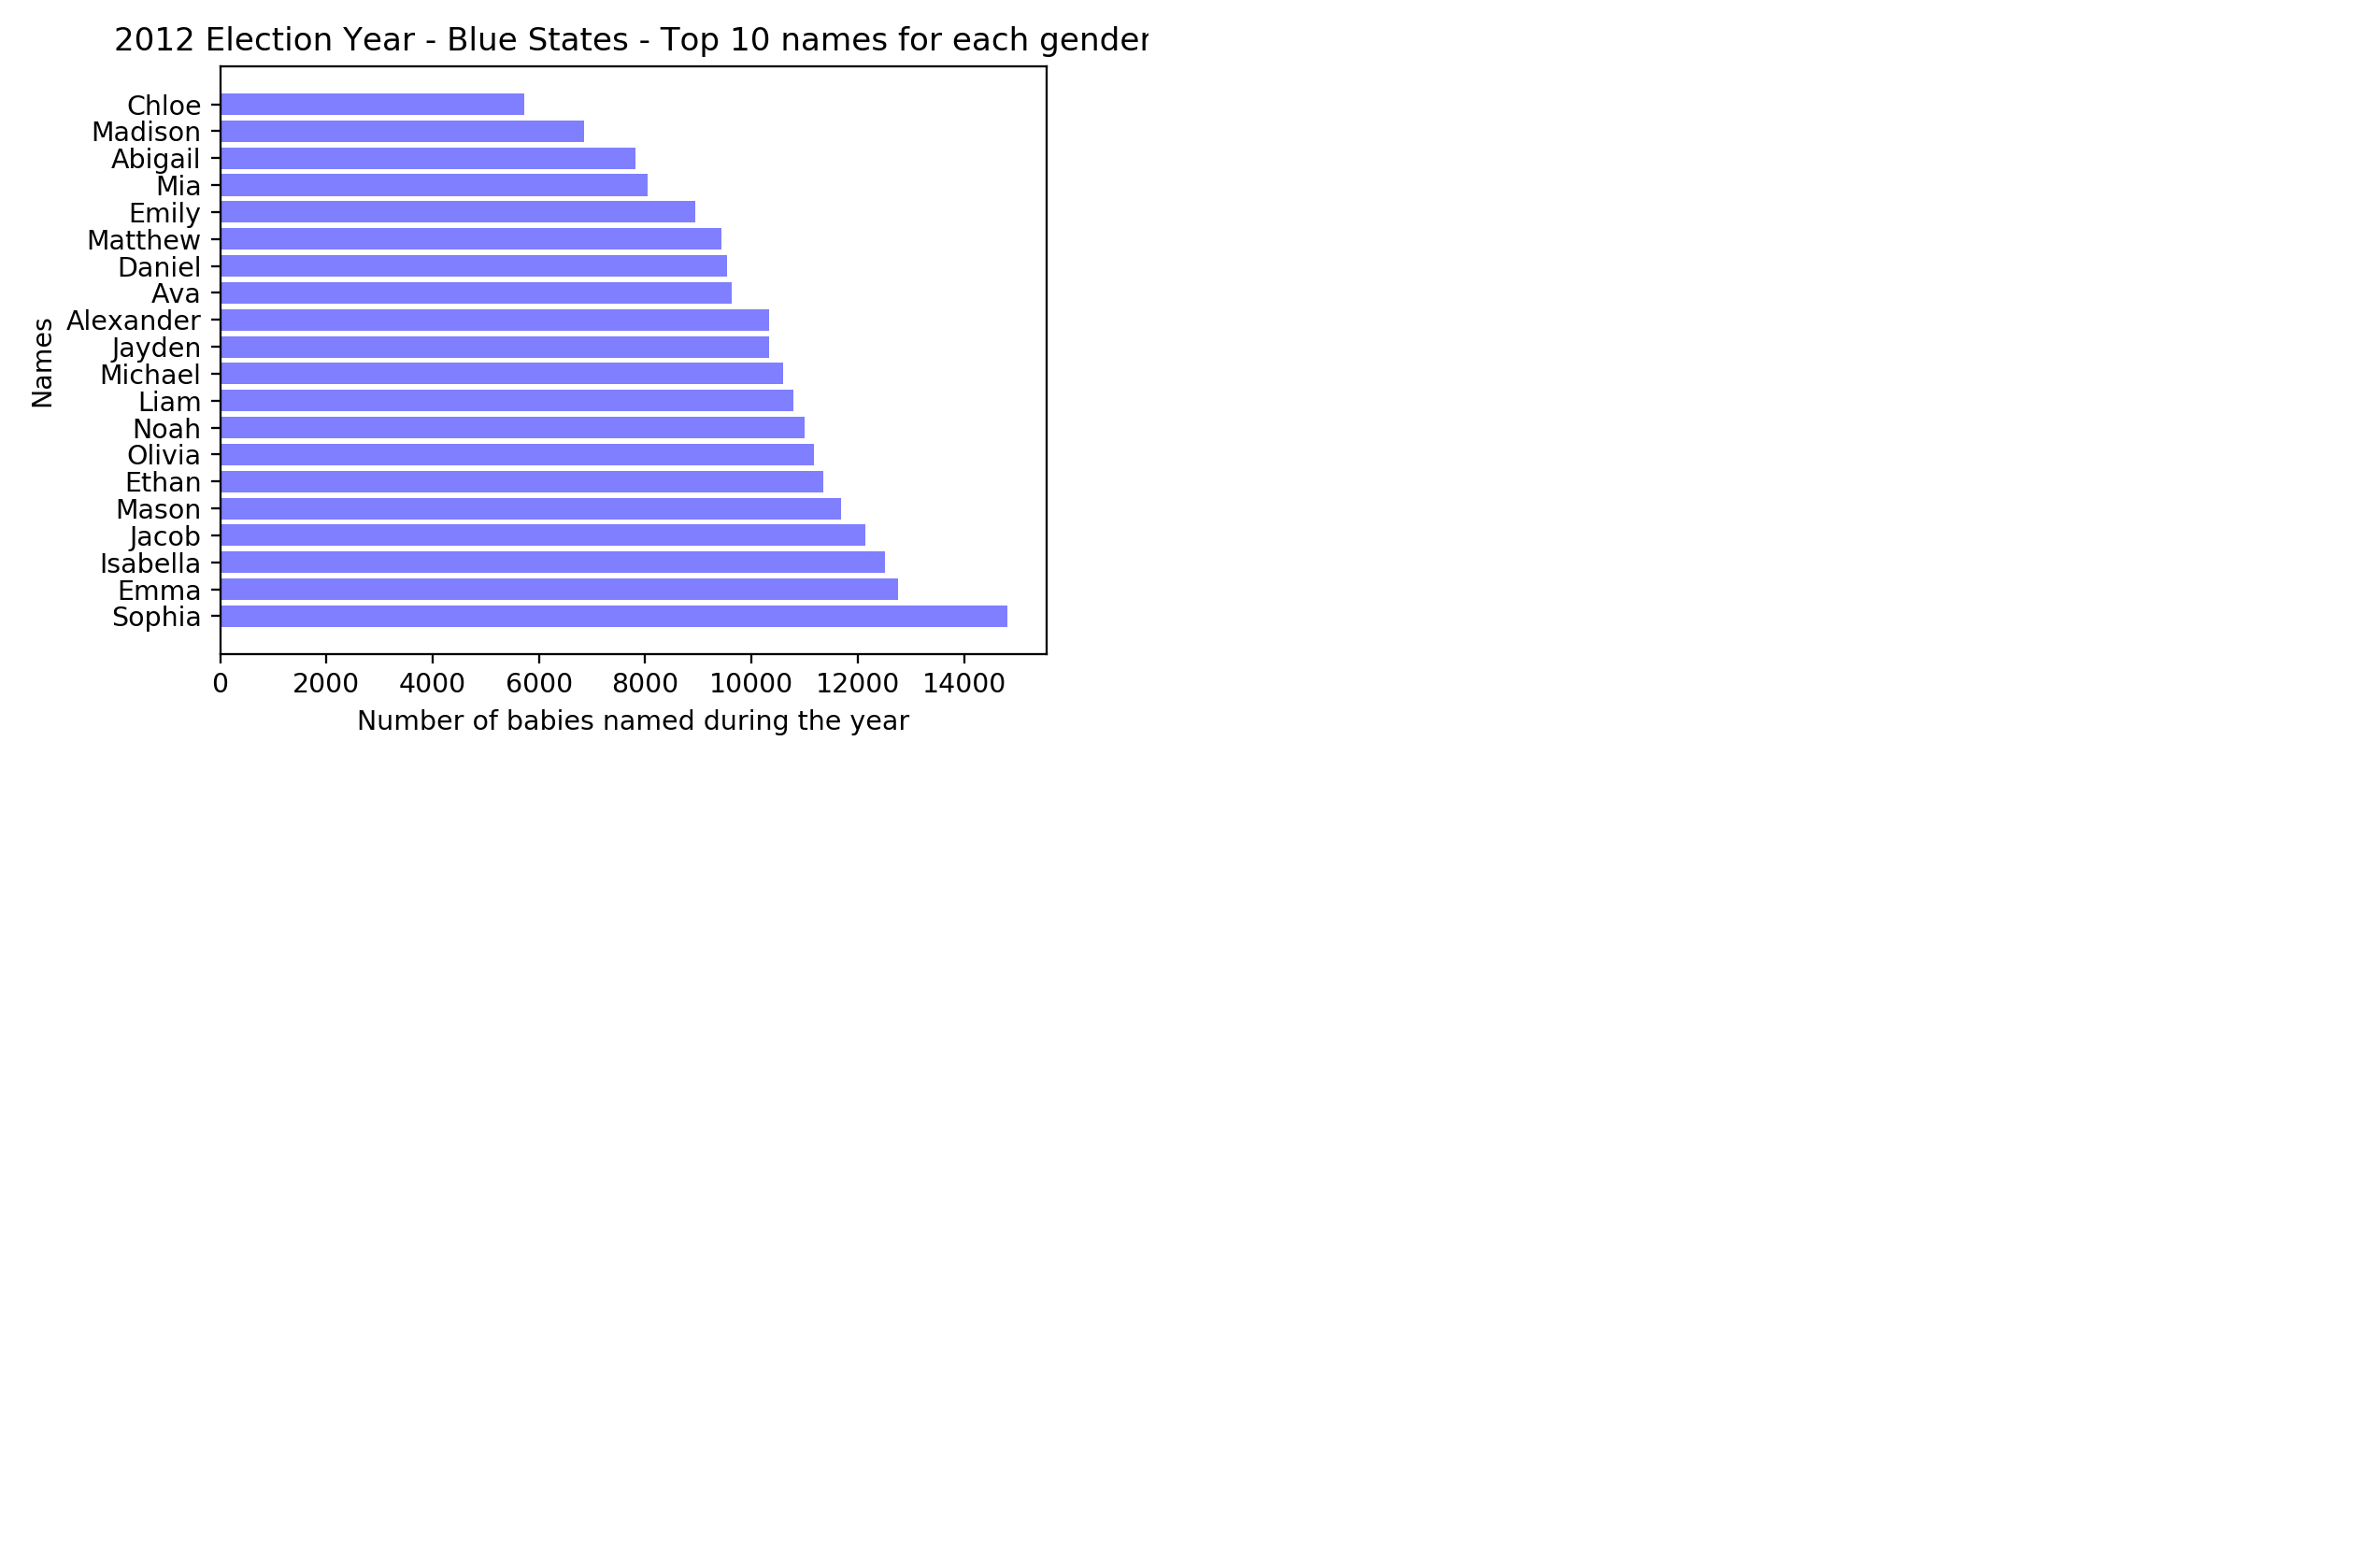

In [9]:
# Set y axis and tick locations
users = topBlueNames2012_sorted['count']
y_axis = np.arange(len(users))
tick_locations = [value for value in y_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.barh(y_axis, users, color='blue', alpha=0.5, align="center")
plt.yticks(tick_locations, topBlueNames2012_sorted['name'], rotation="horizontal")

# Give our chart some labels and a tile
plt.title("2012 Election Year - Blue States - Top 10 names for each gender")
plt.xlabel("Number of babies named during the year")
plt.ylabel("Names")

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("output_data/top10blue2012electionBar.png")
plt.show()

<IPython.core.display.Javascript object>


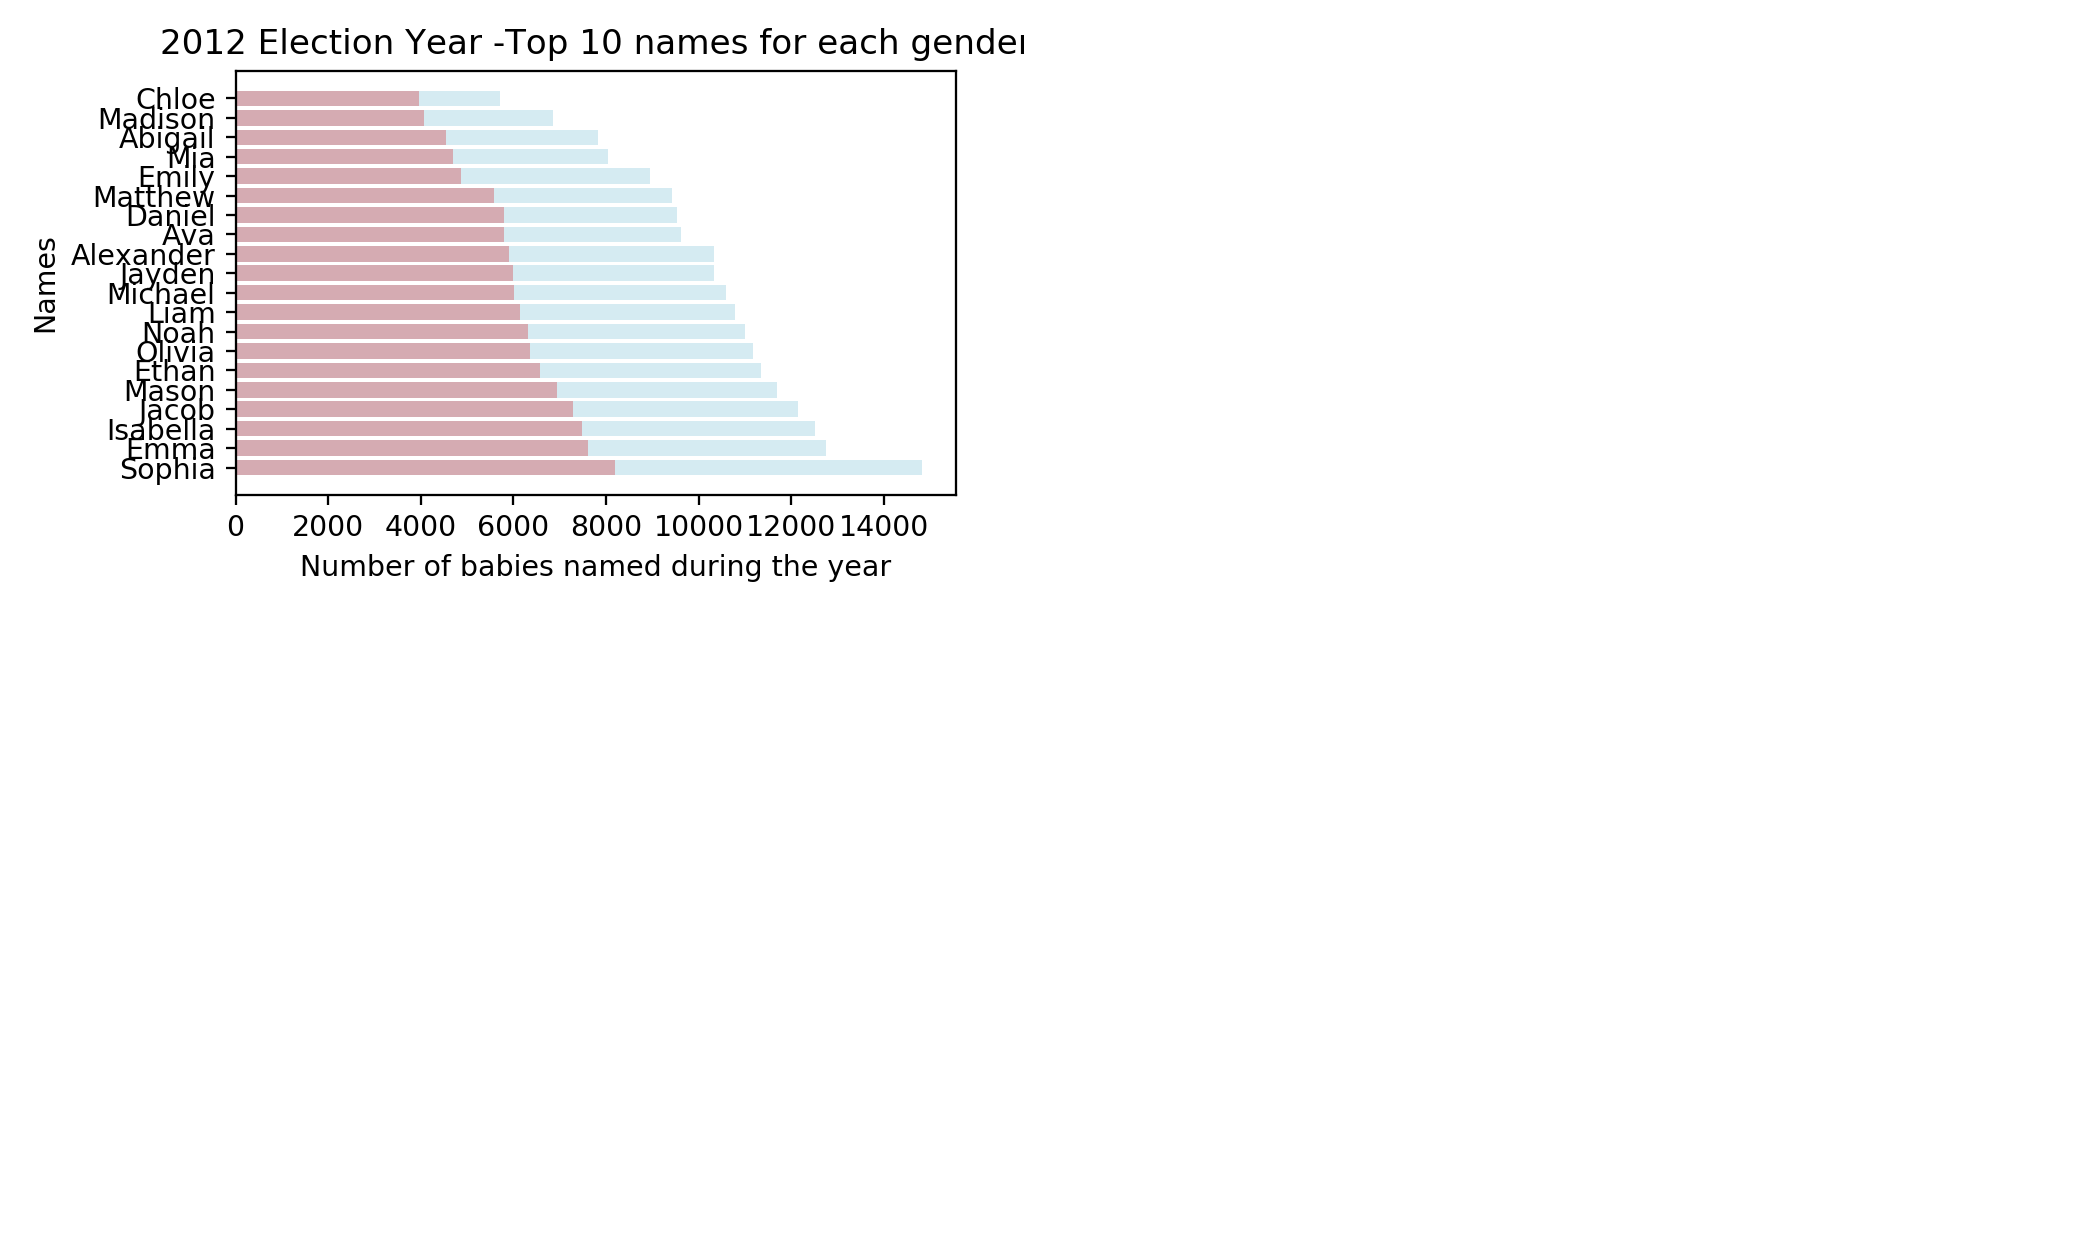

In [10]:
# Set y axis and tick locations for Red States
red_users = topRedNames2012_sorted['count']
y_redaxis = np.arange(len(red_users))
redtick_locations = [value for value in y_redaxis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(5,3))
plt.barh(y_redaxis, red_users, color='red', alpha=0.5, align="center")
plt.yticks(redtick_locations, topRedNames2012_sorted['name'], rotation="horizontal")

# Set y axis and tick locations for Blue States
blue_users = topBlueNames2012_sorted['count']
y_blueaxis = np.arange(len(blue_users))
bluetick_locations = [value for value in y_blueaxis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.barh(y_blueaxis, blue_users, color='lightblue', alpha=0.5, align="center")
plt.yticks(bluetick_locations, topBlueNames2012_sorted['name'], rotation="horizontal")

# Give our chart some labels and a tile
plt.title("2012 Election Year -Top 10 names for each gender")
plt.xlabel("Number of babies named during the year")
plt.ylabel("Names")

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("output_data/top10names2012electionBar.png")
plt.show()

In [11]:
#combine 2012 Red & Blue State results into one DF to idenity matches and variances in top 10 names
name_summary_df=pd.merge(topRedNames2012_sorted,topBlueNames2012_sorted,how='outer', 
                         on=['name','gender'], suffixes=('Red','Blue'))
name_summary_df.replace(np.nan, 0, inplace=True)
name_summary_df.drop(['yearRed','yearBlue'],axis=1).sort_values('gender').reset_index(drop=True)


,gender,name,countRed,countBlue
0,F,Emma,8187.0,12758.0
1,F,Mia,3973.0,8050.0
2,F,Elizabeth,4073.0,0.0
3,F,Madison,4540.0,6857.0
4,F,Emily,4701.0,8948.0
5,F,Abigail,4878.0,7822.0
6,F,Ava,5908.0,9625.0
7,F,Olivia,6139.0,11177.0
8,F,Chloe,0.0,5718.0
9,F,Isabella,6583.0,12516.0


<IPython.core.display.Javascript object>


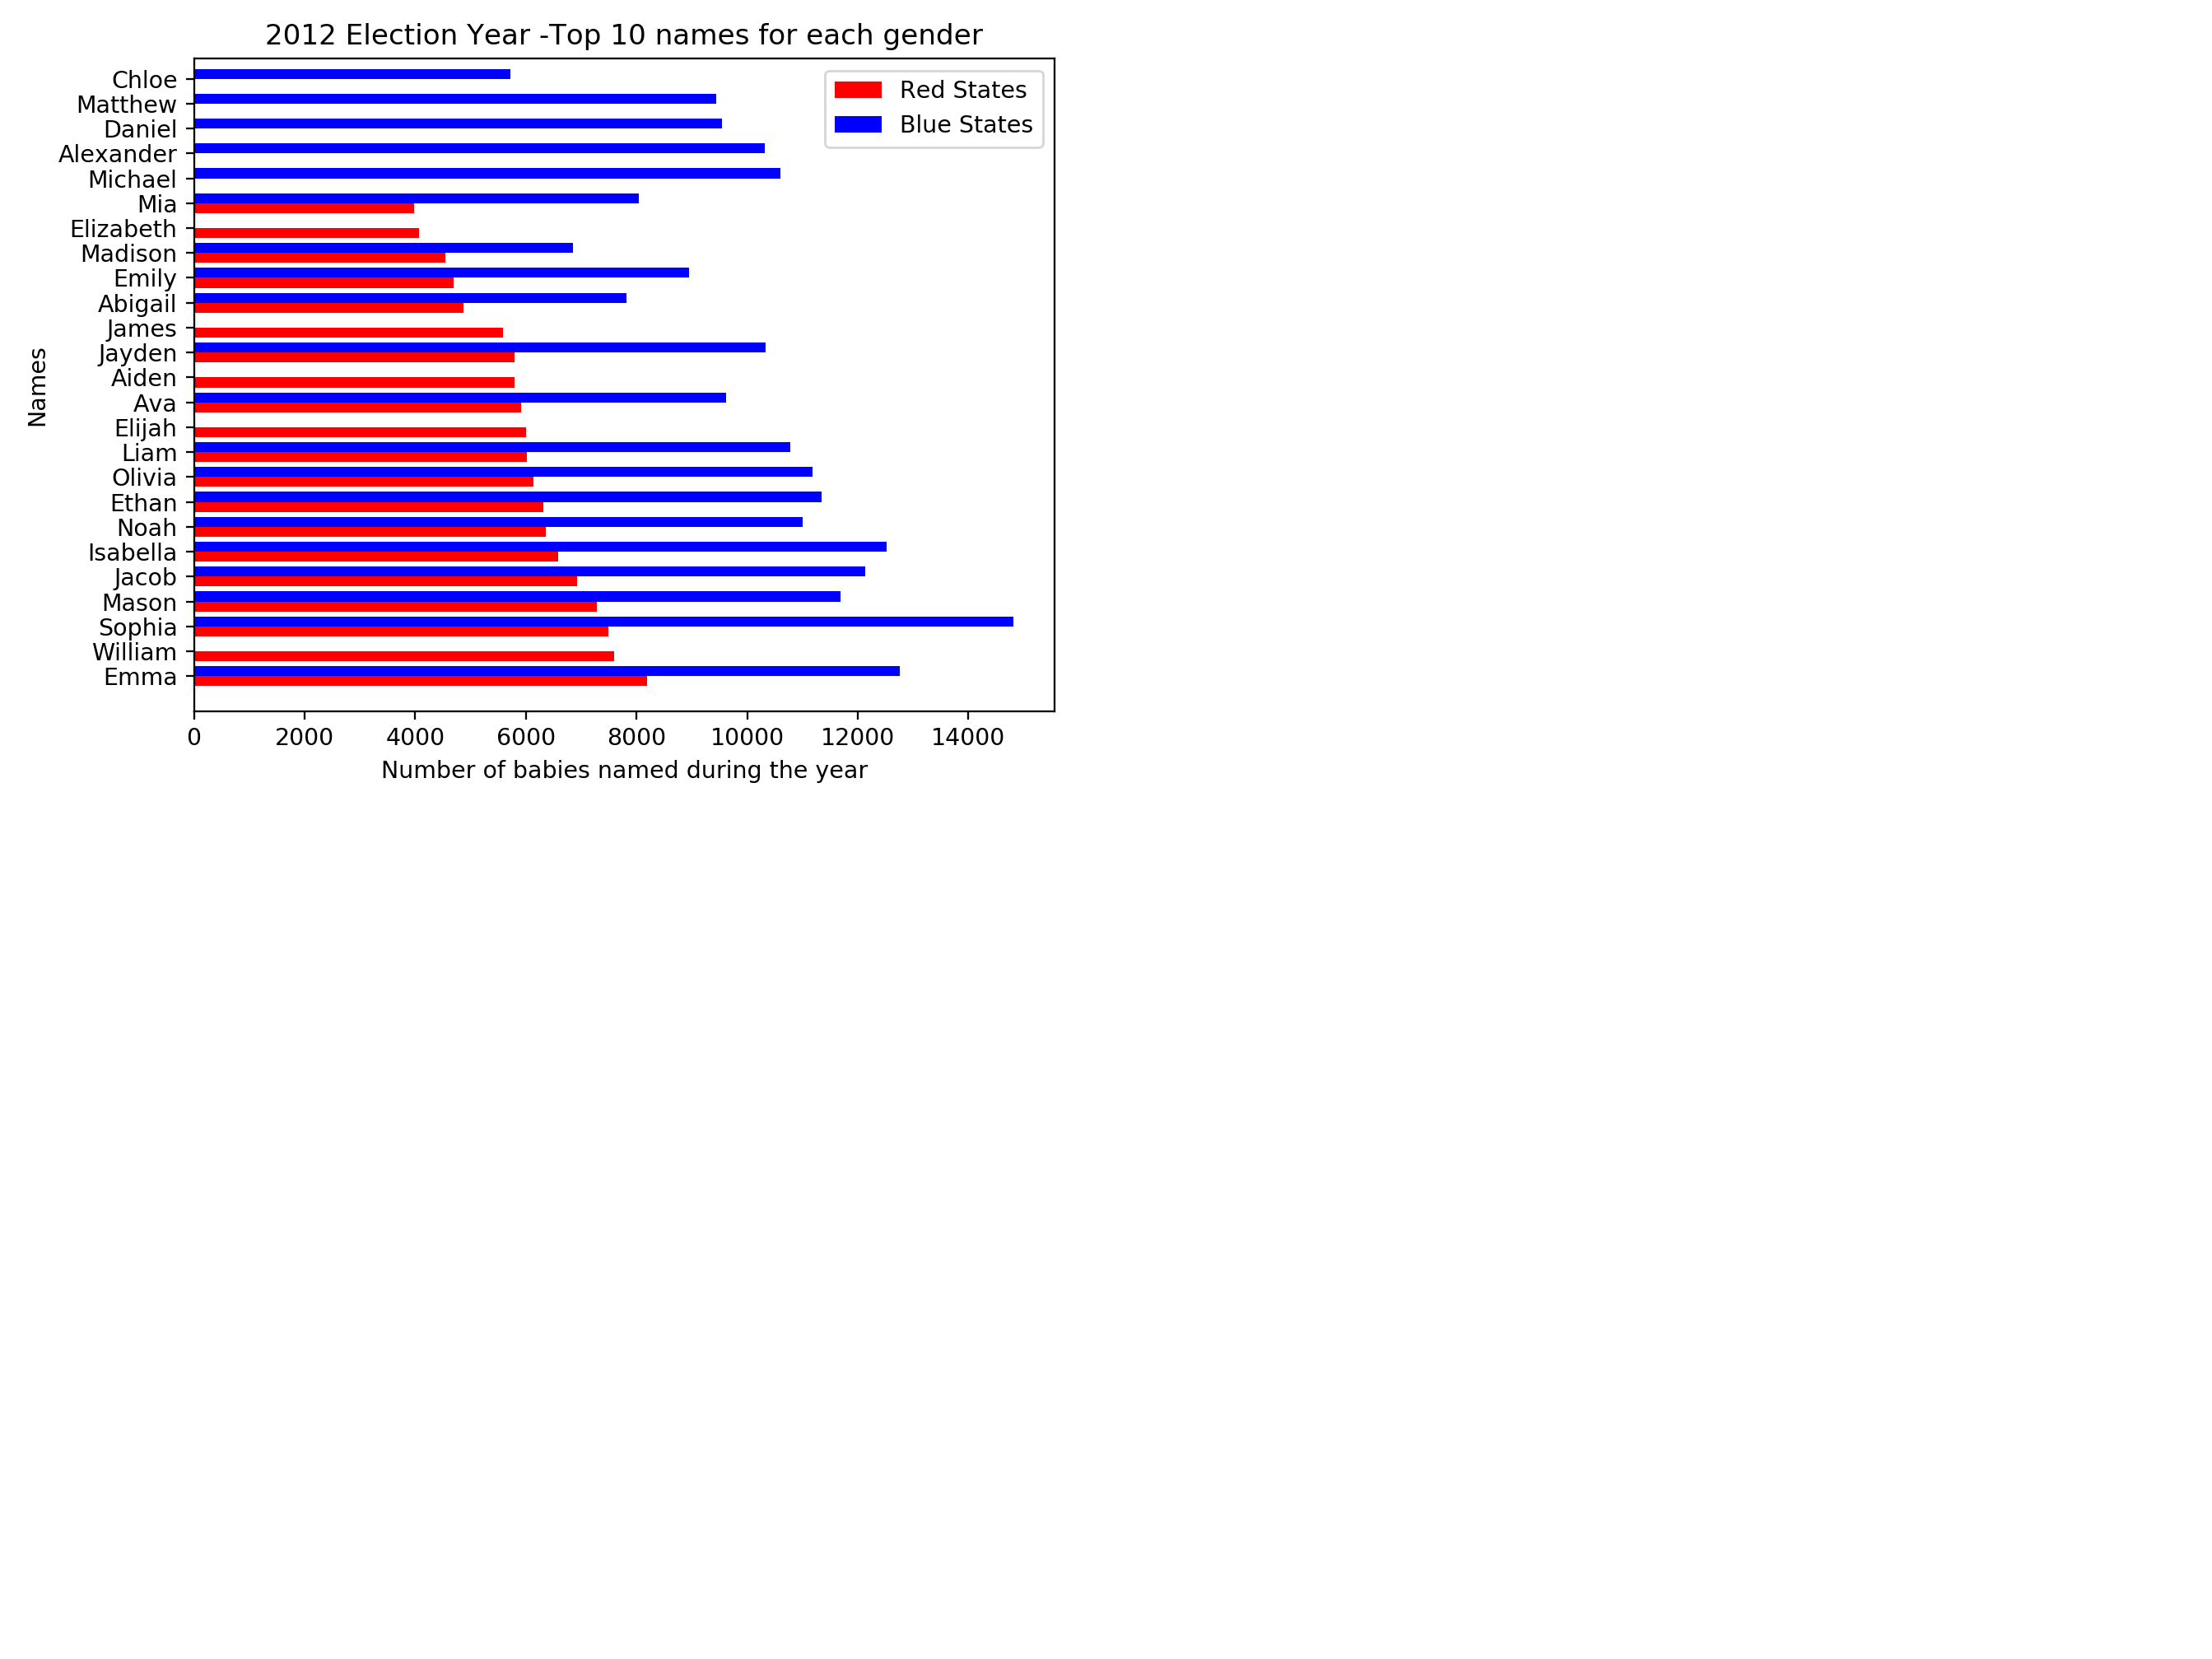

In [12]:
ind=np.arange(len(name_summary_df))
width=.4

fig, ax=plt.subplots()
ax.barh(ind, name_summary_df.countRed, width, color='red', label='Red States')
ax.barh(ind+width, name_summary_df.countBlue, width, color='blue', label='Blue States')

ax.set(yticks=ind+width*.5, yticklabels=name_summary_df.name, ylim=[2*width-2, len(name_summary_df)])
ax.legend()

# Give our chart some labels and a tile
plt.title("2012 Election Year -Top 10 names for each gender")
plt.xlabel("Number of babies named during the year")
plt.ylabel("Names")

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("output_data/combTop10names2012electionBar.png")
plt.show()  

# 2016 Election

In [13]:
#find 10 most pupulart names - for each gender, sorted by the most popular for each gender in decending order
Election2016=name_df.loc[(name_df['year']==2016)].reset_index(drop=True)
#Election2016 #verify df

#find 10 most pupulart names - for each gender, sorted from the most popular in decending order
top10names2016=Election2016.groupby(['gender','year','name'])['count'].sum().reset_index().sort_values(by='count',ascending=False).reset_index(drop=True)
top10names2016_sorted=top10names2016.groupby('gender').head(10)
top10names2016_sorted.sort_values(['gender','count'], ascending=False).reset_index(drop=True) 

,gender,year,name,count
0,M,2016,Noah,19117
1,M,2016,Liam,18218
2,M,2016,William,15761
3,M,2016,Mason,15244
4,M,2016,James,14862
5,M,2016,Benjamin,14641
6,M,2016,Jacob,14510
7,M,2016,Michael,14088
8,M,2016,Elijah,13902
9,M,2016,Ethan,13819


In [14]:
red2016=[]
red2016=States_df.loc[States_df["2016"]=='R','state'].tolist()
#red2016

#create a names df for 2016 red states
red2016names=Election2016[Election2016['state'].isin(red2016)]
#red2016names #.head()

#find 10 most pupulart names - for each gender, sorted by the most popular for each gender in decending order
topRedNames2016=red2016names.groupby(['gender','year','name'])['count'].sum().reset_index().sort_values(by='count',ascending=False).reset_index(drop=True)
topRedNames2016_sorted=topRedNames2016.groupby('gender').head(10)
topRedNames2016_sorted.sort_values(['gender','count'], ascending=False).reset_index(drop=True) 

,gender,year,name,count
0,M,2016,Noah,10546
1,M,2016,Liam,10212
2,M,2016,William,9504
3,M,2016,Mason,8927
4,M,2016,Elijah,8750
5,M,2016,James,8487
6,M,2016,Benjamin,7728
7,M,2016,Michael,7578
8,M,2016,Jacob,7488
9,M,2016,Oliver,7397


In [15]:
blue2016=[]
blue2016=States_df.loc[States_df["2016"]=='D','state'].tolist()
#blue2016

#create a names df for 2016 red states
blue2016names=Election2016[Election2016['state'].isin(blue2016)]
#blue2016names #.head()

#find 10 most pupulart names - for each gender, sorted by the most popular for each gender in decending order
topBlueNames2016=blue2016names.groupby(['gender','year','name'])['count'].sum().reset_index().sort_values(by='count',ascending=False).reset_index(drop=True)
topBlueNames2016_sorted=topBlueNames2016.groupby('gender').head(10)
topBlueNames2016_sorted.sort_values(['gender','count'], ascending=False).reset_index(drop=True) 

,gender,year,name,count
0,M,2016,Noah,8571
1,M,2016,Liam,8006
2,M,2016,Jacob,7022
3,M,2016,Benjamin,6913
4,M,2016,Ethan,6857
5,M,2016,Alexander,6735
6,M,2016,Michael,6510
7,M,2016,Daniel,6437
8,M,2016,Matthew,6427
9,M,2016,James,6375


In [18]:
#combine 2016 Red & Blue State results into one DF to idenity matches and variances in top 10 names
name_2016summary_df=pd.merge(topRedNames2016_sorted,topBlueNames2016_sorted,how='outer', 
                         on=['name','gender'], suffixes=('Red','Blue'))
name_2016summary_df.replace(np.nan, 0, inplace=True)
name_2016summary_df.drop(['yearRed','yearBlue'],axis=1).sort_values('gender').reset_index(drop=True)


,gender,name,countRed,countBlue
0,F,Emma,11124.0,8372.0
1,F,Amelia,6226.0,0.0
2,F,Abigail,6433.0,5327.0
3,F,Harper,6899.0,0.0
4,F,Charlotte,7143.0,5947.0
5,F,Mia,7251.0,7177.0
6,F,Emily,0.0,5384.0
7,F,Isabella,7999.0,6796.0
8,F,Sophia,8306.0,7822.0
9,F,Sofia,0.0,4733.0


<IPython.core.display.Javascript object>


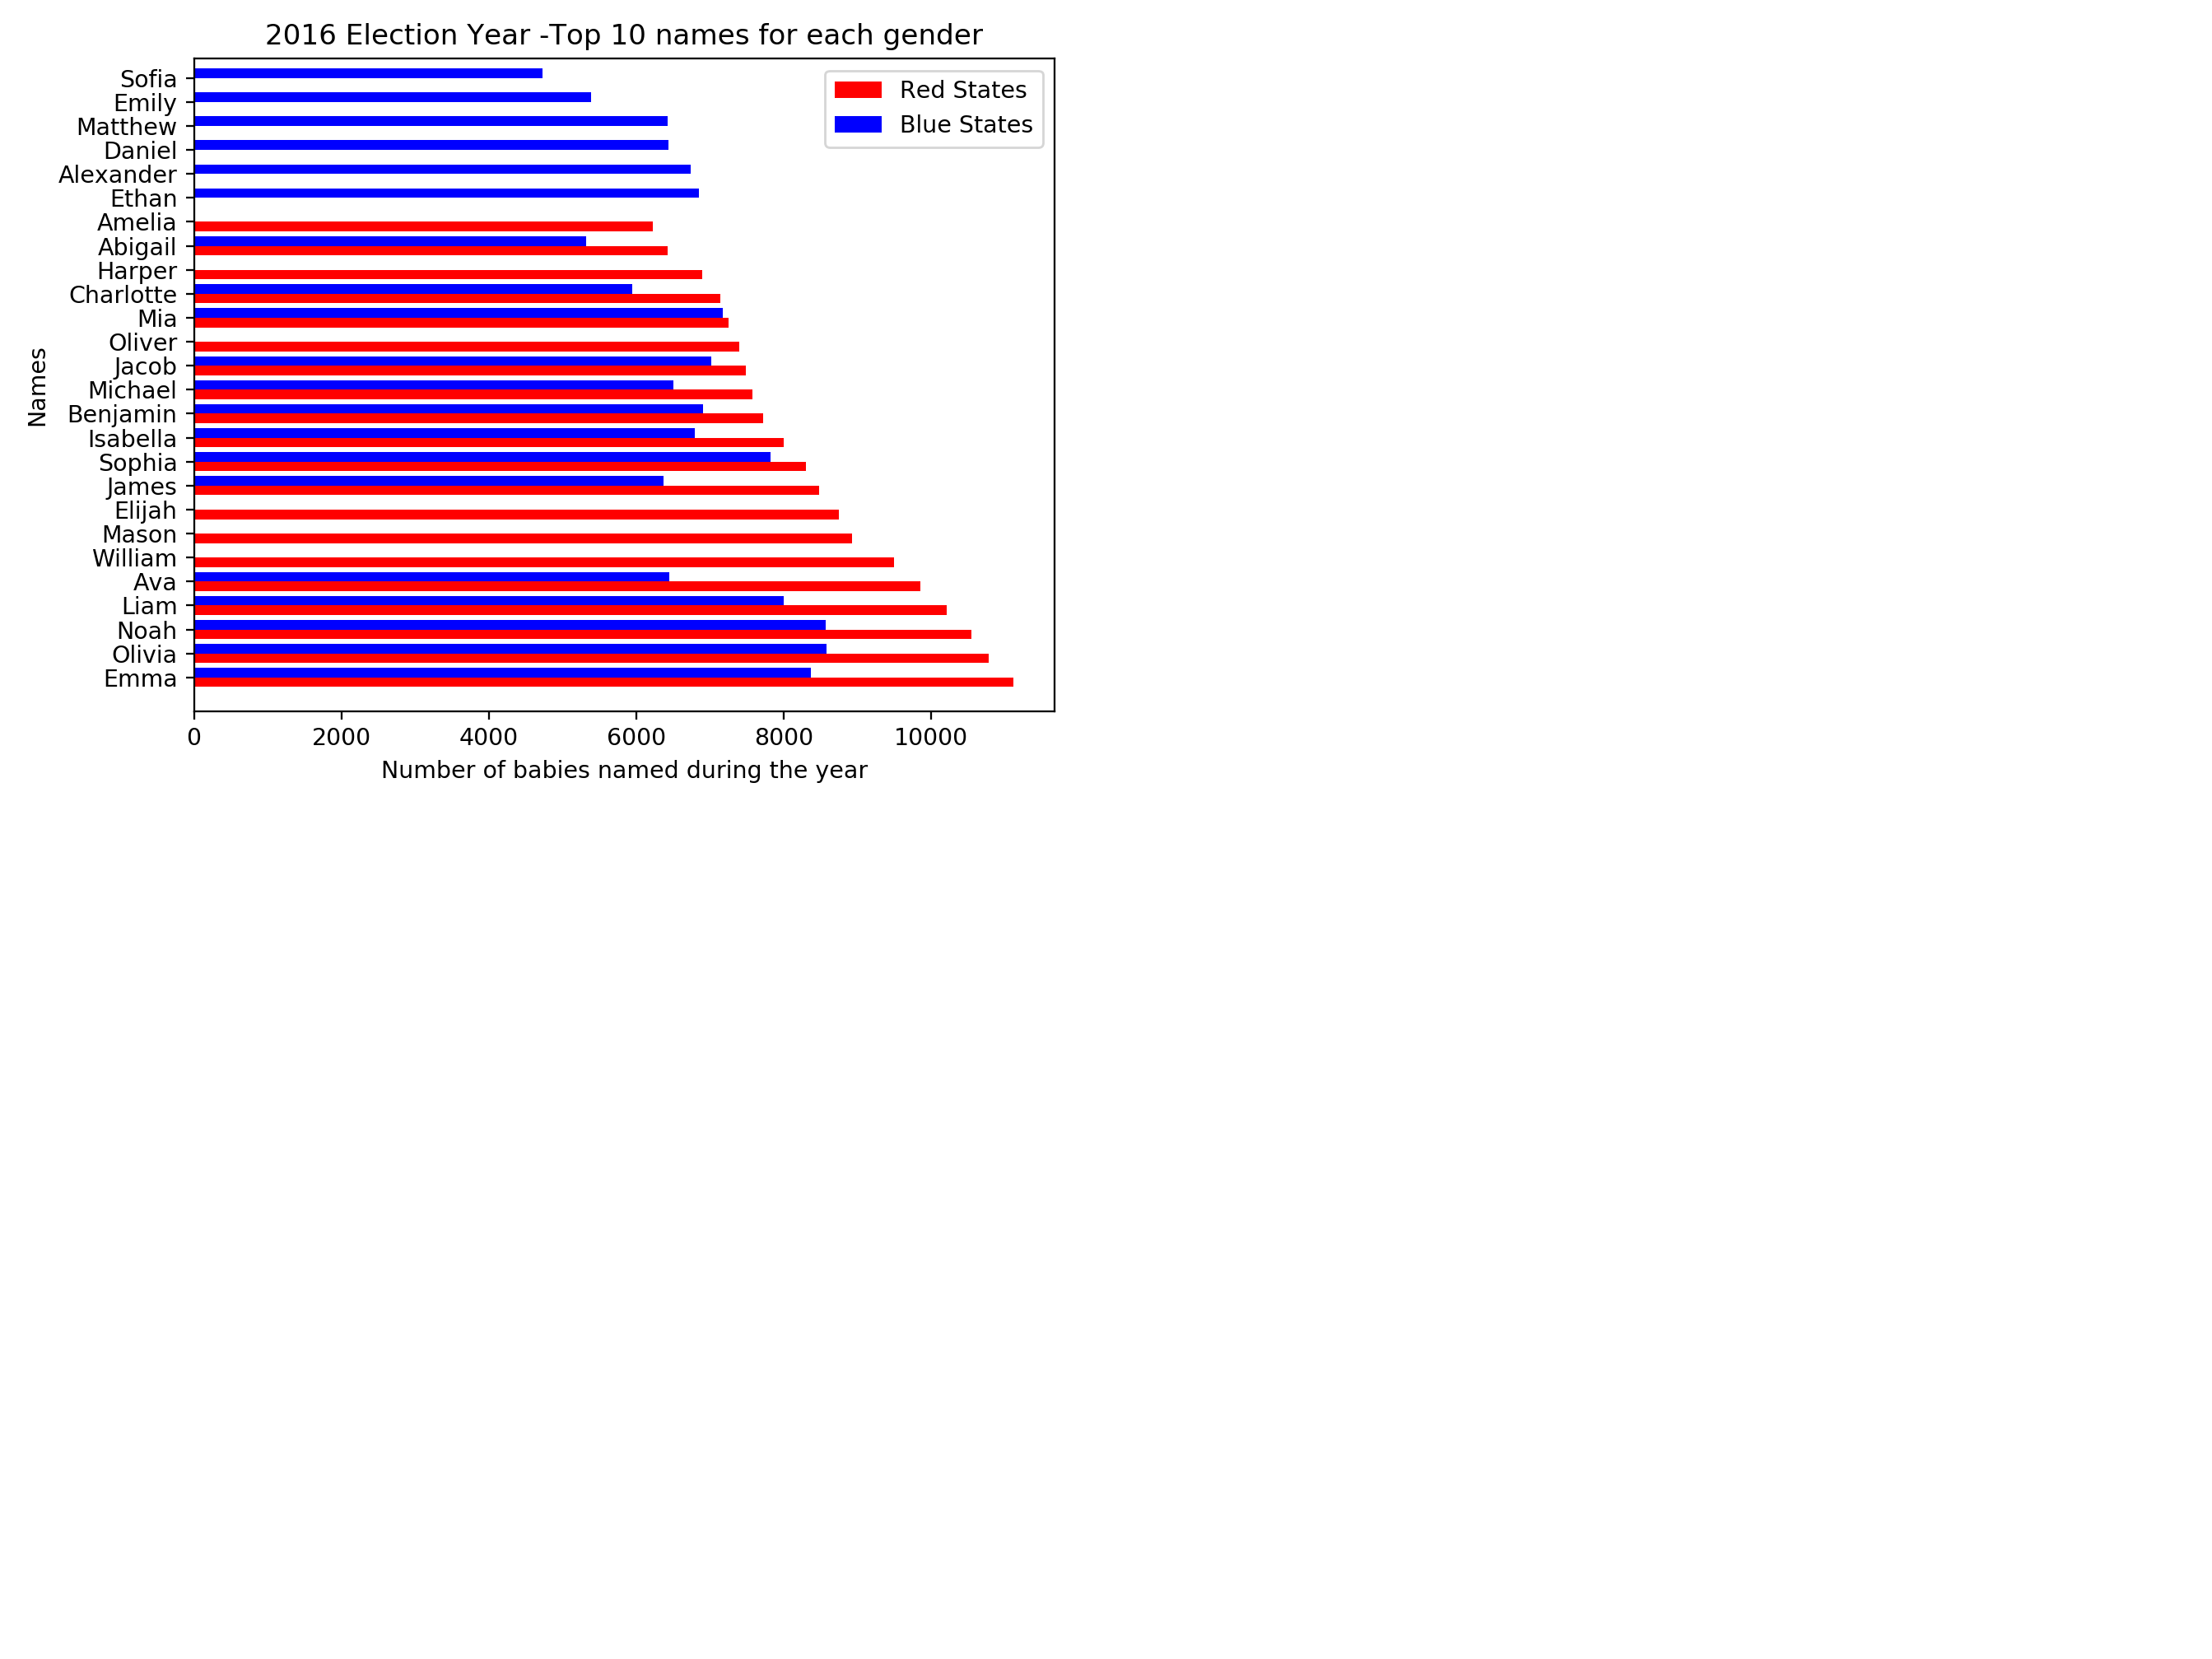

In [19]:
ind=np.arange(len(name_summary_df))
width=.4

fig, ax=plt.subplots()
ax.barh(ind, name_2016summary_df.countRed, width, color='red', label='Red States')
ax.barh(ind+width, name_2016summary_df.countBlue, width, color='blue', label='Blue States')

ax.set(yticks=ind+width*.5, yticklabels=name_2016summary_df.name, ylim=[2*width-2, len(name_summary_df)])
ax.legend()

# Give our chart some labels and a tile
plt.title("2016 Election Year -Top 10 names for each gender")
plt.xlabel("Number of babies named during the year")
plt.ylabel("Names")

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("output_data/combTop10names2016electionBar.png")
plt.show()  